In [30]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
#css_styling()

In [31]:
import numpy as np
import scipy.interpolate as ip
import matplotlib.pyplot as plt

## Problem 2

In this problem, you are asked to estimate the Lebesgue constant for function interpolation. Given a set of nodes $x_0,\ldots x_n\in[a,b]$, the Lebesgue constant $\Lambda_n$ is defined as 

$$ \Lambda_n := \max_{x\in[a,b]} L(x) $$

where

$$ L(x) = \sum_{i=1}^n |L_{i,n}(x)|. $$

Here, $L_{i,n}(x)$ is the Lagrange polynomial number $i$, given by

$$ L_{i,n}(x) = \prod_{j\neq i} \frac{x-x_j}{x_i-x_j}. $$

Using the Lebesgue constant, we can obtain an upper bound for the interpolation error relative to the best interpolation error. Assume that $p$ is some interpolating polynomial and $p^\ast$ is the best interpolating polynomial. Then we have that

$$ \|p-f\| \leq (\Lambda_n+1) \|p^\ast-f\|. $$

Note that this holds for every norm $\|\cdot\|$.

**a)**

Write a function which computes $L(x)$, given a set of nodes $x_0,\ldots x_n$.

In [32]:
def L(x, x_nodes):
    lagsum=0
    length = len(list(x_nodes))
    for i in range(length):
        lagprod=1
        for j in range (length):
            if i!=j:
                lagprod = lagprod*((x-x_nodes[j])/(x_nodes[i]-x_nodes[j]))
        lagsum=lagsum+abs(lagprod)
    return lagsum

#can take vectors as input
def L_vec(x_vec, x_nodes):
    l_prod = prod(x_vec[i] for i in range(n) if i!=j)
    return sum(abs(l_prod))
    
        

We want to estimate $\Lambda_n$ for nodes on the interval $[-1,1]$. Spesifically we want to consider

- Uniformly distributed nodes:  $x_i = -1+2i/n, \ i=0,\ldots n$
- Chebyshev nodes: $x_i = \cos\left(\pi\frac{2i+1}{2n+2}\right), \ i=0,\ldots n$


**b)**

Plot $L(x)$ for $x\in[-1,1]$ and give an estimate for $\Lambda_n$ for $n=5,10,15,20$ for using 

- Uniformly distributed nodes.
- Chebyshev nodes.

What do you observe? Do you expect uniformly distributed nodes or Chebyshev nodes to give a better interpolating polynomial?

*Hint: When estimating $\Lambda_n$, you can construct a very fine grid of values of $x$'s, compute $L(x)$ for each $x$ and find the maximum of all values of $L(x)$.* 

*If you prefer, you may use the following template:*

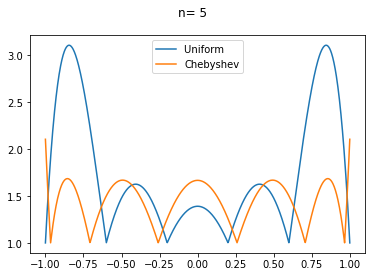

Uniform Lambda_n: 3.106262343309961
Chebyshev Lambda_n: 2.104397682646487


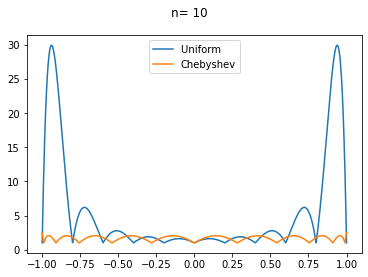

Uniform Lambda_n: 29.89775881601561
Chebyshev Lambda_n: 2.4894303768819768


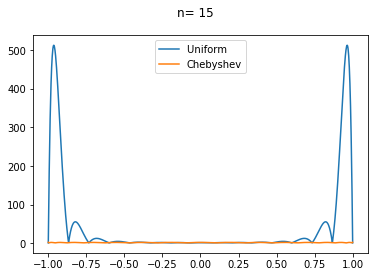

Uniform Lambda_n: 512.3496345042895
Chebyshev Lambda_n: 2.7277779364183505


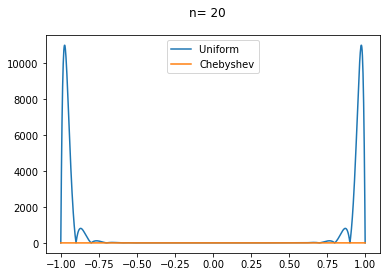

Uniform Lambda_n: 10978.795044663142
Chebyshev Lambda_n: 2.9008249044468988


In [33]:
# Compute a fine grid of x's:
x_vec = np.linspace(-1,1,1000)

# Construct a placeholder for the values of L(x)
L_vec_uni = np.zeros(x_vec.shape)
L_vec_cheb = np.zeros(x_vec.shape)

n=[5, 10, 15, 20]
for k in range (4):
    x_uniform=[]
    x_chebyshev=[]
    for i in range (n[k]+1):
        x_uniform.append(-1+2*i/n[k])
        x_chebyshev.append(np.cos(np.pi*(2*i+1)/(2*n[k]+2)))

# Compute L(x) for all x in x_vec and store the values of L in L_vec.
# For example: L_vec[i] = L(x_vec[i], x_nodes)
    for i in range (1000):
        L_vec_uni[i]=L(x_vec[i], x_uniform)
        L_vec_cheb[i]=L(x_vec[i], x_chebyshev)


    plt.plot(x_vec, L_vec_uni, label="Uniform ")
    plt.plot(x_vec, L_vec_cheb, label="Chebyshev")
    plt.suptitle('n= %d' % (n[k]))
    plt.legend()
    plt.show()
    
    Lambda_n_estimate = np.max(L_vec_uni)
    Lambda_n_estimate2 = np.max(L_vec_cheb)

    print ("Uniform Lambda_n:", Lambda_n_estimate) #Uniform
    print("Chebyshev Lambda_n:", Lambda_n_estimate2) #Chebyshev


# Lambda_n_estimate will now approximate the true value of Chebyshev's constant




<font color ='blue'>
    Your comments here: Observe that using Chebyshev nodes gives a much better interpolation polynomial than uniformly distributed nodes. $\Lambda_n$ is lower than $3$ for all the computed n-values when using chebyshev, whereas it grows very large for the uniform nodes. This is due to the extremely bad interpolation at the tails, and we observe that the value of $\Lambda_{20}$ for uniform nodes is above 10000.
    
</font>